# DLthon - 길찾은 오리들
## Base Settings

In [1]:
# importing the libraries
import keras, tensorflow as tf
from keras import layers

# keras.mixed_precision.set_global_policy('mixed_float16')

# importing the modules
import models_base, models_top, utils

2025-01-20 17:05:43.937928: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-20 17:05:43.951608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737360343.963581  399589 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737360343.966404  399589 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 17:05:43.976859: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_unified_datasets("data/data_disruptive_feature_exclusion")

Found 374 files belonging to 6 classes.
Using 300 files for training.


I0000 00:00:1737360346.810168  399589 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 374 files belonging to 6 classes.
Using 74 files for validation.


In [3]:
# designing the model

def eV2L_simple2(): # this can be adjusted to be hyper-tunable
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v1()(inputs)
    x = models_base.EV2L((224, 224, 3))(inputs, training=False)
    x = models_top.simple2()(x)
    outputs = layers.Dense(6, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    
    model.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])
    
    return model

In [5]:
eV2L_simple2_history = eV2L_simple2().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_simple2.keras'),
        utils.callback_earlystop(30)
    ],
)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 86s 10s/step - accuracy: 0.1734 - loss: 1.8225 - val_accuracy: 0.1719 - val_loss: 1.8117
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 662ms/step - accuracy: 0.2684 - loss: 1.6747 - val_accuracy: 0.2656 - val_loss: 1.6548
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 687ms/step - accuracy: 0.3660 - loss: 1.6012 - val_accuracy: 0.4375 - val_loss: 1.5202
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 692ms/step - accuracy: 0.4703 - loss: 1.4187 - val_accuracy: 0.5000 - val_loss: 1.4942
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 820ms/step - accuracy: 0.5272 - loss: 1.3549 - val_accuracy: 0.6562 - val_loss: 1.1919
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.5249 - loss: 1.2996 - val_accuracy: 0.4531 - val_loss: 1.2683
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.5408 - loss: 1.2096 - val_accuracy: 0.3906 - val_loss: 1.4458
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 660ms/step - accuracy: 0.5513 - loss: 1.1426 - val_accuracy: 0.6562 - va

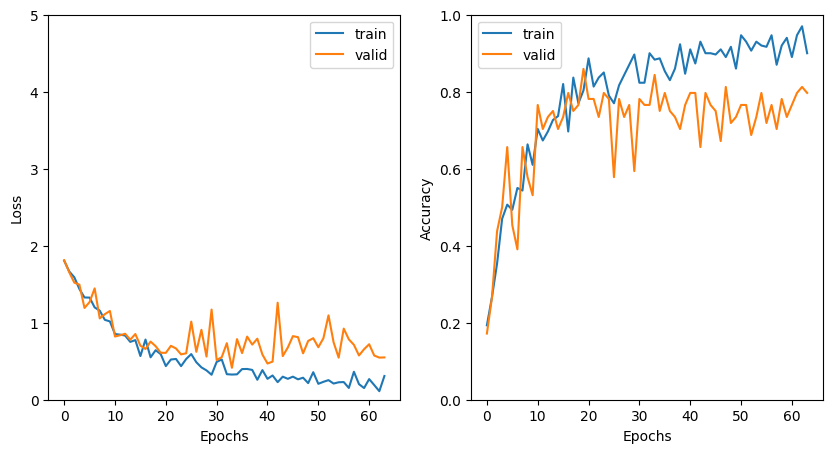

In [6]:
utils.plot_history(eV2L_simple2_history)

In [7]:
eV2L_simple2_history_best = keras.models.load_model('eV2L_simple2.keras')
test_loss, test_acc = eV2L_simple2_history_best.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.8000 - loss: 0.5951
Test accuracy: 0.80%, Test loss: 0.60


## Second Trial: MobileNetV2 + Top1

In [ ]:
def mV2_simple1():
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v1()(inputs)
    x = models_base.MV2()(inputs, training=False)
    x = models_top.simple1()(x)
    outputs = layers.Dense(6, activation='softmax')(x)

    model = keras.Model(inputs, outputs)

    model.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])

    return model

mV2_simple1_history = mV2_simple1().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('mV2_simple1.keras'),
        utils.callback_earlystop(80)
    ],
)

In [ ]:
utils.plot_history(mV2_simple1_history)

In [ ]:
mV2_simple1_best = keras.models.load_model('mV2_simple1.keras')
test_loss, test_acc = mV2_simple1_best.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")